In [1]:
import cv2
cv2.__version__

'4.6.0'

In [2]:
import cvlib as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvlib.object_detection import draw_bbox

In [3]:
df_2019 = pd.read_csv('traffic_2019.csv', index_col=0)
df_2019 = df_2019[df_2019['camera_id'] == 1709]
df_2019.reset_index(inplace=True, drop=True)
df_2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce
1,2019-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe
2,2019-01-01T00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8
3,2019-01-01T00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873
4,2019-01-01T00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98
...,...,...,...,...,...,...,...,...
30205,2019-01-31T23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05
30206,2019-01-31T23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28
30207,2019-01-31T23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53
30208,2019-01-31T23:58:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0c172e9da57d5e8e241d6ca05e25347e


In [4]:
df_2020 = pd.read_csv('traffic_2020.csv', index_col = 0)
df_2020 = df_2020[df_2020['camera_id'] == 1709]
df_2020.reset_index(inplace=True, drop=True)
df_2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2019-12-31T23:59:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5
1,2020-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b
2,2020-01-01T00:01:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb
3,2020-01-01T00:02:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347
4,2020-01-01T00:03:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23
...,...,...,...,...,...,...,...,...
29932,2020-01-31T23:53:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8
29933,2020-01-31T23:54:50+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf
29934,2020-01-31T23:56:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276
29935,2020-01-31T23:57:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d85d5d9db869044c3f64b54fa5fcb41d


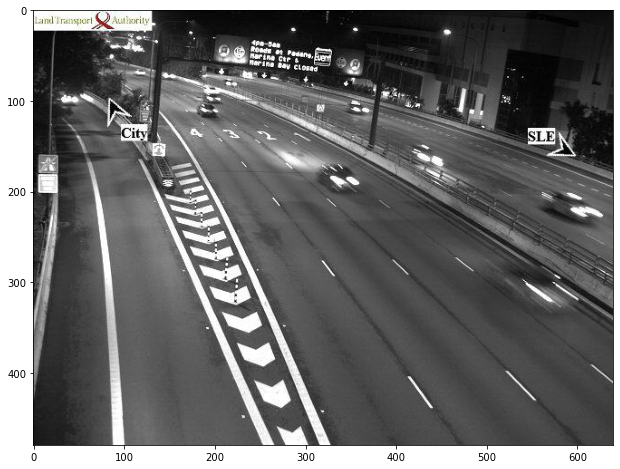

In [5]:
img = cv2.imread('car_image_2019_Jan/1.jpg')
ax = plt.figure(figsize=(12, 8))
plt.imshow(img)

In [6]:
bbox, label, conf = cv.detect_common_objects(img, model='yolov4',enable_gpu=True)

output_image = draw_bbox(img, bbox, label, conf)

In [7]:
label

['car', 'car', 'car']

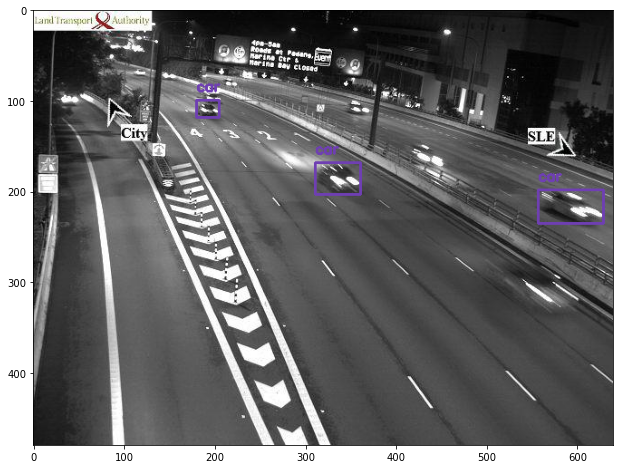

In [8]:
ax = plt.figure(figsize=(12, 8))
plt.imshow(output_image)

In [9]:
def getLabelCount(index, folder_path):
  try:
    img = cv2.imread(folder_path + index + '.jpg')
    bbox, labels, conf = cv.detect_common_objects(img, model='yolov4',enable_gpu=True)
  except:
    labels = []
  car_count = 0
  for label in labels:
    if label == 'car':
      car_count += 1
  return car_count

In [10]:
 # Test getLabelCount
for i in range(5): 
  print(getLabelCount(str(i), 'car_image_2019_Jan/'))

6
3
2
5
4


In [11]:
# Get number of cars for all rows of 2019 data frame
nr_cars_2019 = []
path_2019_img = 'car_image_2019_Jan/'

for i in range(len(df_2019)):
  nr_cars_2019.append(getLabelCount(str(i), path_2019_img))

In [12]:
df_2019['num_cars'] = nr_cars_2019
df_2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce,6
1,2019-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe,3
2,2019-01-01T00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8,2
3,2019-01-01T00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873,5
4,2019-01-01T00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98,4
...,...,...,...,...,...,...,...,...,...
30205,2019-01-31T23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05,0
30206,2019-01-31T23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28,0
30207,2019-01-31T23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53,0
30208,2019-01-31T23:58:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0c172e9da57d5e8e241d6ca05e25347e,0


In [13]:
df_2019.to_csv('traffic_2019_with_car_nums.csv')

In [14]:
# Get number of cars for all rows of 2020 data frame
nr_cars_2020 = []
path_2020_img = 'car_image_2020_Jan/'

for i in range(len(df_2020)):
  nr_cars_2020.append(getLabelCount(str(i), path_2020_img))

In [15]:
df_2020['num_cars'] = nr_cars_2020
df_2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2019-12-31T23:59:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5,2
1,2020-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b,6
2,2020-01-01T00:01:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb,5
3,2020-01-01T00:02:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347,9
4,2020-01-01T00:03:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23,3
...,...,...,...,...,...,...,...,...,...
29932,2020-01-31T23:53:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8,0
29933,2020-01-31T23:54:50+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf,0
29934,2020-01-31T23:56:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276,0
29935,2020-01-31T23:57:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d85d5d9db869044c3f64b54fa5fcb41d,0


In [16]:
df_2020.to_csv('traffic_2020_with_car_nums.csv')